## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bootcamp/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Soal

### Categorical Data Encoding

pada kolom PaymentMethod, InternetService, OnlineSecurity, Contract <br><br>

lakukan Categorical Data Encoding, dari 4 kolom tersebut wajib 1 kolom menggunakan frequency encoding, 1 kolom mean encoding, dan sisa nya bebas.<br><br>

kemudian setelah dilakukan proses Categorical Data Encoding, gabungkan dengan data awal

In [ ]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Mean Encoding

In [ ]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
freq_et= data['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et

,PaymentMethod,freq_PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [ ]:
sum_et = data.groupby(['PaymentMethod']).agg({'SeniorCitizen':sum}).reset_index()
sum_et.rename(columns={"SeniorCitizen": "sum_PaymentMethod"}, inplace = True)
sum_et

,PaymentMethod,sum_PaymentMethod
0,Bank transfer (automatic),233
1,Credit card (automatic),221
2,Electronic check,594
3,Mailed check,94


In [ ]:
mean_ec = freq_et.merge(sum_et, on='PaymentMethod', how='inner')
mean_ec['mean_ec_PaymentMethod'] = round((mean_ec['sum_PaymentMethod']/mean_ec['freq_PaymentMethod']),2)
mean_ec

,PaymentMethod,freq_PaymentMethod,sum_PaymentMethod,mean_ec_PaymentMethod
0,Electronic check,2365,594,0.25
1,Mailed check,1612,94,0.06
2,Bank transfer (automatic),1544,233,0.15
3,Credit card (automatic),1522,221,0.15


In [ ]:
data = data.merge(mean_ec[['PaymentMethod','mean_ec_PaymentMethod']], on='PaymentMethod', how='inner')
data[['PaymentMethod','mean_ec_PaymentMethod']]

,PaymentMethod,mean_ec_PaymentMethod
0,Electronic check,0.25
1,Electronic check,0.25
2,Electronic check,0.25
3,Electronic check,0.25
4,Electronic check,0.25
...,...,...
7038,Credit card (automatic),0.15
7039,Credit card (automatic),0.15
7040,Credit card (automatic),0.15
7041,Credit card (automatic),0.15


In [ ]:
data = data.drop('PaymentMethod', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,mean_ec_PaymentMethod
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,29.85,29.85,No,0.25
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,0.25
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes,0.25
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,104.80,3046.05,Yes,0.25
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,105.50,2686.05,No,0.25


Frequensi Encoding

In [ ]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
freq_et = data['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_InternetService"}, inplace = True)
freq_et['pct_InternetService'] = round((freq_et['freq_InternetService']/freq_et['freq_InternetService'].sum())*100,2)
freq_et

,InternetService,freq_InternetService,pct_InternetService
0,Fiber optic,3096,43.96
1,DSL,2421,34.37
2,No,1526,21.67


In [ ]:
data = data.merge(freq_et[['InternetService','pct_InternetService']], on='InternetService', how='inner')
data[['InternetService','pct_InternetService']]

,InternetService,pct_InternetService
0,DSL,34.37
1,DSL,34.37
2,DSL,34.37
3,DSL,34.37
4,DSL,34.37
...,...,...
7038,No,21.67
7039,No,21.67
7040,No,21.67
7041,No,21.67


In [ ]:
data = data.drop('InternetService', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,mean_ec_PaymentMethod,pct_InternetService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,No,No,Month-to-month,Yes,29.85,29.85,No,0.25,34.37
1,8779-QRDMV,Male,1,No,No,1,No,No phone service,No,No,...,No,No,Yes,Month-to-month,Yes,39.65,39.65,Yes,0.25,34.37
2,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,No,Yes,...,No,No,No,Month-to-month,No,30.20,30.2,Yes,0.25,34.37
3,4080-IIARD,Female,0,Yes,No,13,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Month-to-month,Yes,76.20,981.45,No,0.25,34.37
4,5122-CYFXA,Female,0,No,No,3,Yes,No,No,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,75.30,244.1,No,0.25,34.37


One Hot Encoding

In [ ]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
dummies_OnlineSecurity = pd.get_dummies(data['OnlineSecurity'],prefix='OnlineSecurity')
dummies_OnlineSecurity.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [ ]:
data = pd.concat([data, dummies_OnlineSecurity], axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,mean_ec_PaymentMethod,pct_InternetService,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,Month-to-month,Yes,29.85,29.85,No,0.25,34.37,1,0,0
1,8779-QRDMV,Male,1,No,No,1,No,No phone service,No,No,...,Month-to-month,Yes,39.65,39.65,Yes,0.25,34.37,1,0,0
2,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,No,Yes,...,Month-to-month,No,30.20,30.2,Yes,0.25,34.37,1,0,0
3,4080-IIARD,Female,0,Yes,No,13,Yes,Yes,Yes,Yes,...,Month-to-month,Yes,76.20,981.45,No,0.25,34.37,0,0,1
4,5122-CYFXA,Female,0,No,No,3,Yes,No,No,Yes,...,Month-to-month,Yes,75.30,244.1,No,0.25,34.37,1,0,0


In [ ]:
data[['OnlineSecurity_No','OnlineSecurity_No internet service','OnlineSecurity_Yes']].corr()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
OnlineSecurity_No,1.000000,-0.522429,-0.629717
OnlineSecurity_No internet service,-0.522429,1.000000,-0.333403
OnlineSecurity_Yes,-0.629717,-0.333403,1.000000


In [ ]:
data = data.drop('OnlineSecurity', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,mean_ec_PaymentMethod,pct_InternetService,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,Month-to-month,Yes,29.85,29.85,No,0.25,34.37,1,0,0
1,8779-QRDMV,Male,1,No,No,1,No,No phone service,No,Yes,...,Month-to-month,Yes,39.65,39.65,Yes,0.25,34.37,1,0,0
2,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,Yes,No,...,Month-to-month,No,30.20,30.2,Yes,0.25,34.37,1,0,0
3,4080-IIARD,Female,0,Yes,No,13,Yes,Yes,Yes,No,...,Month-to-month,Yes,76.20,981.45,No,0.25,34.37,0,0,1
4,5122-CYFXA,Female,0,No,No,3,Yes,No,Yes,No,...,Month-to-month,Yes,75.30,244.1,No,0.25,34.37,1,0,0


Ordinal Encoding

In [ ]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
map_Contract = {'Month-to-month':0,
                'One year':1,
                'Two year':2}
data['Contract_cat'] = data['Contract'].map(map_Contract)
data[['Contract','Contract_cat']].head()

,Contract,Contract_cat
0,Month-to-month,0
1,Month-to-month,0
2,Month-to-month,0
3,Month-to-month,0
4,Month-to-month,0


In [ ]:
data[['Contract','Contract_cat']].drop_duplicates()

,Contract,Contract_cat
0,Month-to-month,0
7,Two year,2
8,One year,1


In [ ]:
data = data.drop('Contract', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,mean_ec_PaymentMethod,pct_InternetService,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_cat
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,Yes,29.85,29.85,No,0.25,34.37,1,0,0,0
1,8779-QRDMV,Male,1,No,No,1,No,No phone service,No,Yes,...,Yes,39.65,39.65,Yes,0.25,34.37,1,0,0,0
2,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,Yes,No,...,No,30.20,30.2,Yes,0.25,34.37,1,0,0,0
3,4080-IIARD,Female,0,Yes,No,13,Yes,Yes,Yes,No,...,Yes,76.20,981.45,No,0.25,34.37,0,0,1,0
4,5122-CYFXA,Female,0,No,No,3,Yes,No,Yes,No,...,Yes,75.30,244.1,No,0.25,34.37,1,0,0,0


### Outlier Handling

In [ ]:
data1 = sns.load_dataset('tips')
data1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Bagaimana handling outlier pada kolom total_bill??

In [ ]:
from scipy import stats

In [ ]:
data1['log_total_bill']=np.log(data1['total_bill']+1)

<function matplotlib.pyplot.tight_layout>

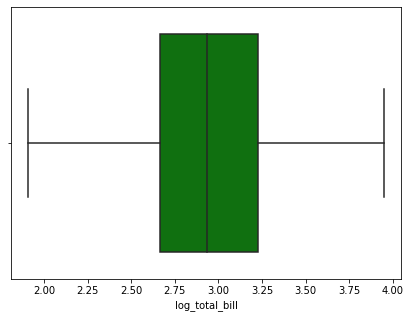

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data1['log_total_bill'],color='green',orient='h')

plt.tight_layout

In [ ]:
print('Jumlah baris sebelum handling outlier pada kolom total_bill:', len(data1))
data1['total_bill zscore'] = abs(stats.zscore(data1['log_total_bill']))
data1.head()

Jumlah baris sebelum handling outlier pada kolom total_bill: 243


,total_bill,tip,sex,smoker,day,time,size,log_total_bill,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816,0.164588
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336,1.315956
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497,0.338596
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993,0.624258
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202,0.714596


In [ ]:
data1 = data1[data1['total_bill zscore'] < 3]
print(f'Jumlah baris setelah memfilter outlier:', len(data1))
data1.head()

Jumlah baris setelah memfilter outlier: 243


,total_bill,tip,sex,smoker,day,time,size,log_total_bill,total_bill zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,2.889816,0.164588
1,10.34,1.66,Male,No,Sun,Dinner,3,2.428336,1.315956
2,21.01,3.50,Male,No,Sun,Dinner,3,3.091497,0.338596
3,23.68,3.31,Male,No,Sun,Dinner,2,3.205993,0.624258
4,24.59,3.61,Female,No,Sun,Dinner,4,3.242202,0.714596


In [ ]:
((244-243)/244)*100

0.4098360655737705

<function matplotlib.pyplot.tight_layout>

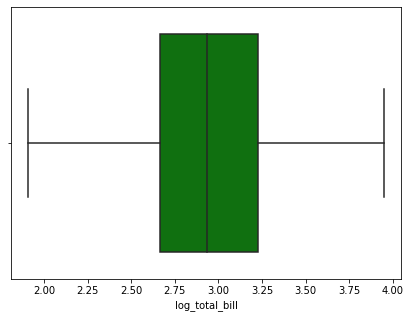

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data1['log_total_bill'],color='green',orient='h')

plt.tight_layout   